In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 이미지 준비 거대고양이

(1280, 1920, 3)


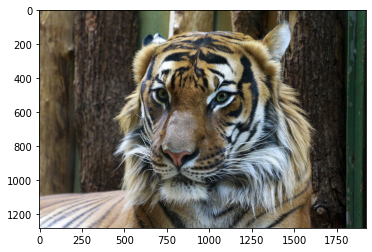

In [3]:
img_path = '/aiffel/aiffel/human_segmentation/images/tiger.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 학습된 모델 다운로드

In [4]:
import requests
model_dir = '/aiffel/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [5]:
res = requests.get(model_url)
with open(model_file, 'wb') as model:
    model.write(res.content)

In [6]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [8]:
# 사전 학습된 모델의 레이블 클래스
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

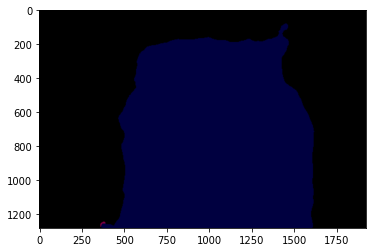

In [9]:
plt.imshow(output)
plt.show()

In [10]:
# 예측한 모델 값
segvalues

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


In [12]:
colormap = np.zeros((256,3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1)  << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
LABEL_NAMES

['background',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tv']

In [14]:
colormap[8]

array([64,  0,  0])

In [15]:
seg_color = (0,0,64)

## 이미지 추출 확인

(1280, 1920)


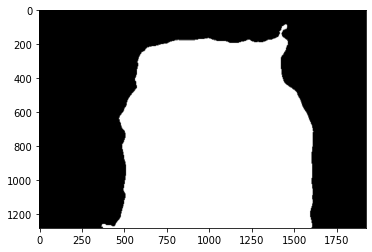

In [16]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

## 원본과 겹쳐보기

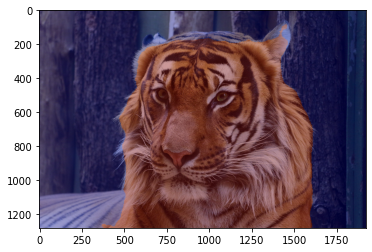

In [17]:
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

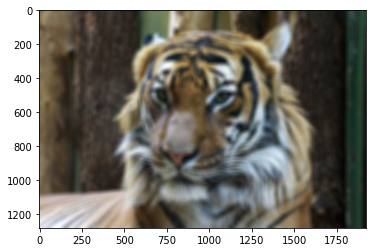

In [18]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

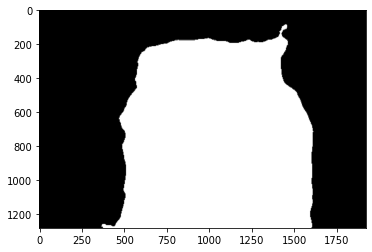

In [19]:
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)

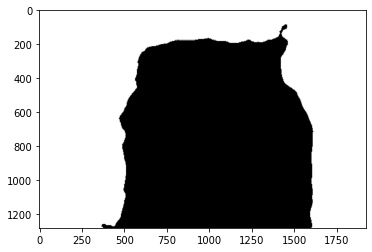

In [20]:
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)

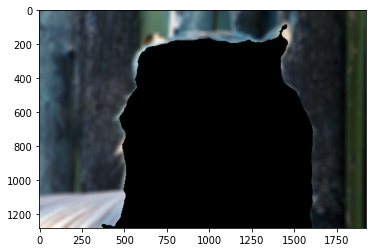

In [21]:
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)

## 이미지 합성

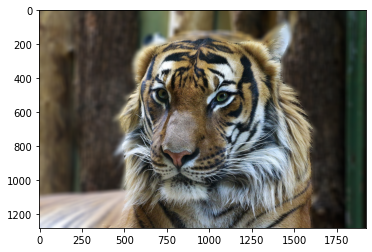

In [22]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

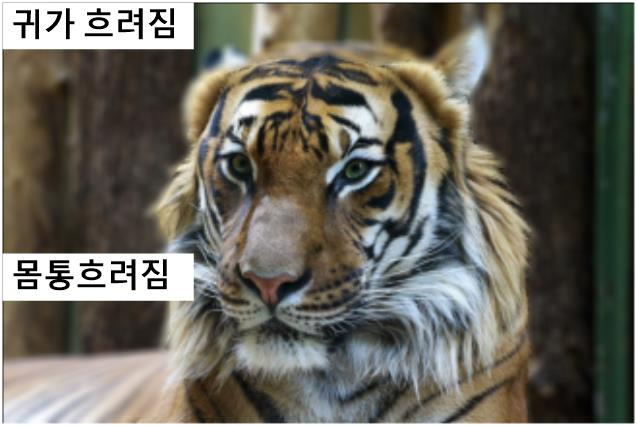

## 이미지 준비 거대 맹수

(545, 979, 3)


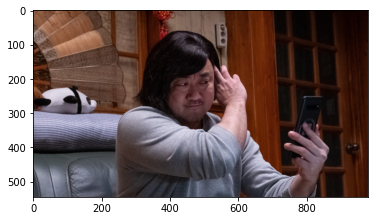

In [24]:
img_path = '/aiffel/aiffel/human_segmentation/images/madong.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 모델 로드

In [25]:
segvalues, output = model.segmentAsPascalvoc(img_path)

## 모델 결과

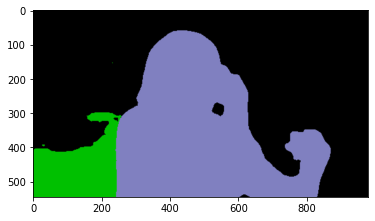

In [26]:
plt.imshow(output)
plt.show()

## 예측 결과

In [27]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
sofa


In [28]:
# 사람 컬러맵 확인
colormap[15]

array([192, 128, 128])

In [29]:
# 컬러맵 뒤집기 BGR 순서를 RGB로
seg_color = (128,128,192)

(545, 979)


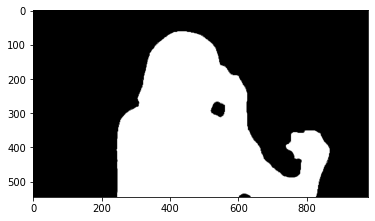

In [30]:
# 이미지 추출 확인
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

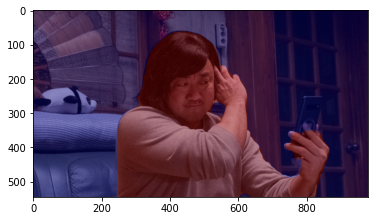

In [31]:
# 원본과 합쳐보기
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

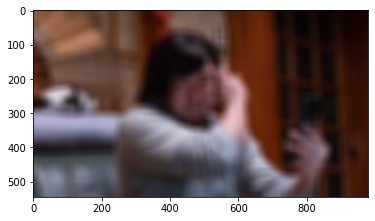

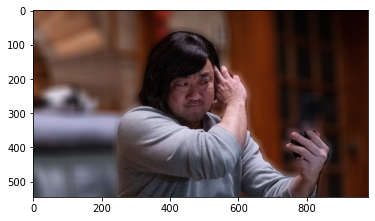

In [32]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

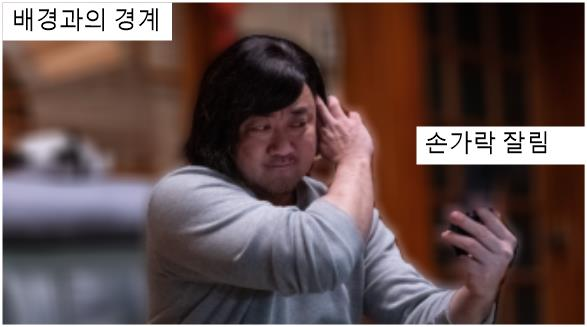

(296, 397, 3)


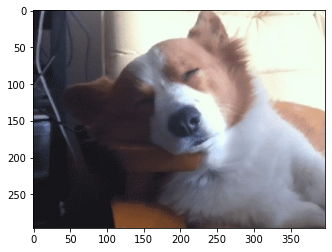

In [40]:
img_path = '/aiffel/aiffel/human_segmentation/images/dog.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
segvalues, output = model.segmentAsPascalvoc(img_path)

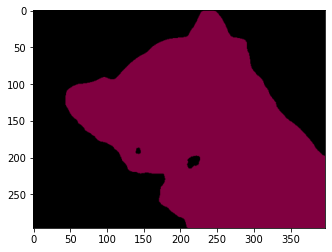

In [42]:
plt.imshow(output)
plt.show()

In [43]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [44]:
# 강아지 컬러맵 확인
colormap[12]

array([ 64,   0, 128])

In [46]:
# 컬러맵 뒤집기 BGR 순서를 RGB로
seg_color = (128,0,64)

(296, 397)


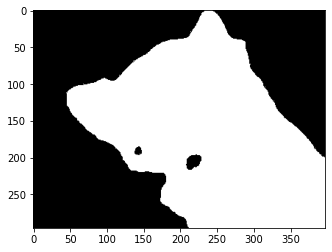

In [47]:
# 이미지 추출 확인
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [48]:
milky_path = '/aiffel/aiffel/human_segmentation/images/milky.jpg'
milky_orig = cv2.imread(milky_path)

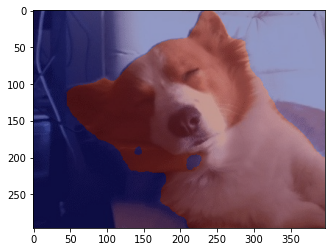

In [50]:
# 원본과 합쳐보기
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

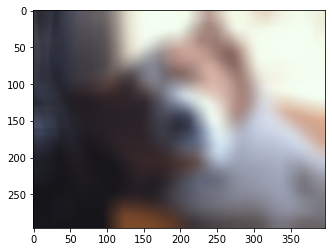

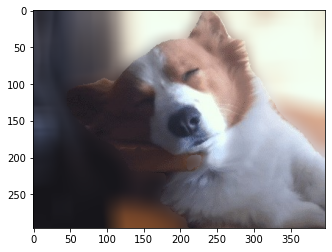

In [51]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
milky_path = '/aiffel/aiffel/human_segmentation/images/milky.jpg'
milky_orig = cv2.imread(milky_path)

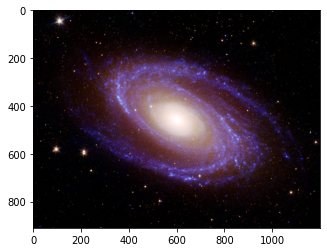

In [53]:
plt.imshow(milky_orig)

In [61]:
milky_orig.shape

(910, 1200, 3)

In [67]:
resized_milky = cv2.resize(milky_orig, dsize=(397,296))

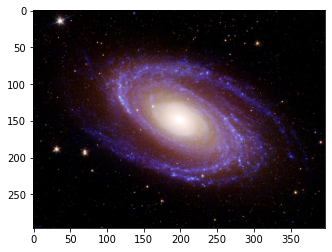

In [68]:
plt.imshow(resized_milky)

In [59]:
img_bg_mask.shape

(296, 397, 3)

In [69]:
resized_milky.shape

(296, 397, 3)

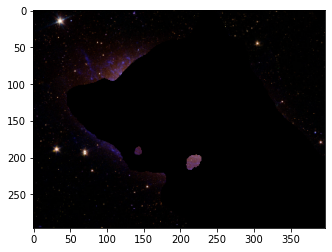

In [70]:
img_bg_blur = cv2.bitwise_and(resized_milky, img_bg_mask)
plt.imshow(img_bg_blur)

## 인셉션

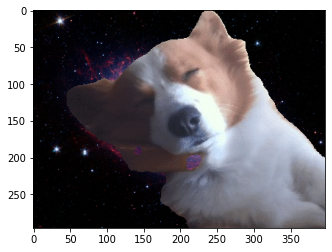

In [71]:
img_concat = np.where(img_mask_color==255, img_orig, resized_milky)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

인물에 대한 사진은 저번처럼 셀카 찍기가 민망해서 동물들의 얼굴을 적극 활용하였다
마동석과 호랑이군이 협찬을 해주어서 인물모드처럼 아웃포커싱의 효과를 주어 미션을 수행했고, 마지막 작품명 인셉션의 강아지를 투입해서 최종 크로마키 사진을 마무리 했다
인물사진 모드나, 인셉션에서도 보이듯이 detection 할때 경계가 뚜렷하지 않아서
배경과 함께 흐릿해지거나, 마지막 강아지의 경우 턱선이 잘려나가면서 다소 날렵해지는 현상이 존재했다
이에대해서 다소 기술이 진보한 것으로 보이나 기술 적용에 계속해서 어려움이 존재했다
일단 노드에서 나온 기술을 적용하고자 하니 Tensorflow 1.X버전대에 머물러 있는 코드여서 사용환경을 다 뜯어고치면서 해야하는 상황에 직면했다보니 이걸 피했고, 그외에 방법으로는 역시 해당 Semantic Segmentation 기술계의 Sota 기술을 찾고자 했고, Microsoft사에서 만든 Swin-Transformer라는 걸 사용해보고 싶었으나, 다소 최근 기술이라 그런지 튜토리얼이 명확하게 없었고, API 사용을 위한 공식문서가 크게 존재하지 않아서 도입하기가 어려웠다, 다른 해결책을 찾고자, 자연어처리의 모델들이 허브에 있듯이, 텐서플로우와 https://mmsegmentation.readthedocs.io/en/latest/inference.html MMsegmentation 홈페이지에 찾아다니며 사용법을 찾고자 했으나 사용환경을 심하게 타느라 개발환경 구성 과정에서 컨테이너안에 의존성 충돌로 역시 실패하고 말았다
만약 기술을 적용한다면 팀원 전체가 공식문서를 제대로 활용할 수 있고, 튜토리얼이 있는 모델로 해야했기에 어떤 모델을 적용 할지에 대한 서치가 필요한 듯 한데, 단시간내에는 생각하기 어려운 과제인 듯 했다
대략적인 흐름 자체는 object를 detection 한 뒤에 다시 그 물체 주변으로 masking을 하면서 캐릭터 테두리르 좀 더 명확히 하려는 흐름을 확인했고, 이에대한 Pretrained Model과 Pipeline이 구성된다면 사용할만 할 듯 하다
전이학습을 할때에는 config와 model train checkpoint에 대한 설명이 https://mmsegmentation.readthedocs.io/en/latest/inference.html 홈페이지에 나와있어서
참고하면 될 것 같다